In [1]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

---

# **셋째마당. 실전! 데이터 분석 프로젝트**
---
---


# 09 데이터 분석 프로젝트  - 한국인의 삶을 파악하라!

## 09-1 '한국복지패널 데이터' 분석 준비하기

### 데이터 분석 준비하기

#### 1. 데이터 준비하기

#### 2. 패키지 설치 및 로드하기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#### 3. 데이터 불러오기

In [3]:
!cd

D:\OneDrive\Project\Doit_Python\Notebook


In [4]:
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기 
welfare = raw_welfare.copy()

#### 4. 데이터 검토하기

In [5]:
welfare             # 앞부분, 뒷부분 출력

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [6]:
welfare.shape       # 행, 열 개수 출력

(14418, 830)

In [7]:
welfare.info()      # 변수 속성 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [8]:
welfare.describe()  # 요약 통계량

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


#### 5. 변수명 바꾸기

In [9]:
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교 
                                    'p1402_8aq1' : 'income',         #  월급 
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

## 09-2 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?

### 성별 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [10]:
welfare['sex'].dtypes  # 변수 타입 출력

dtype('float64')

In [11]:
welfare['sex'].value_counts()  # 빈도 구하기

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

#### 2. 전처리하기

In [12]:
# 이상치 확인
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [13]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
 
# 결측치 확인
welfare['sex'].isna().sum()

0

In [14]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

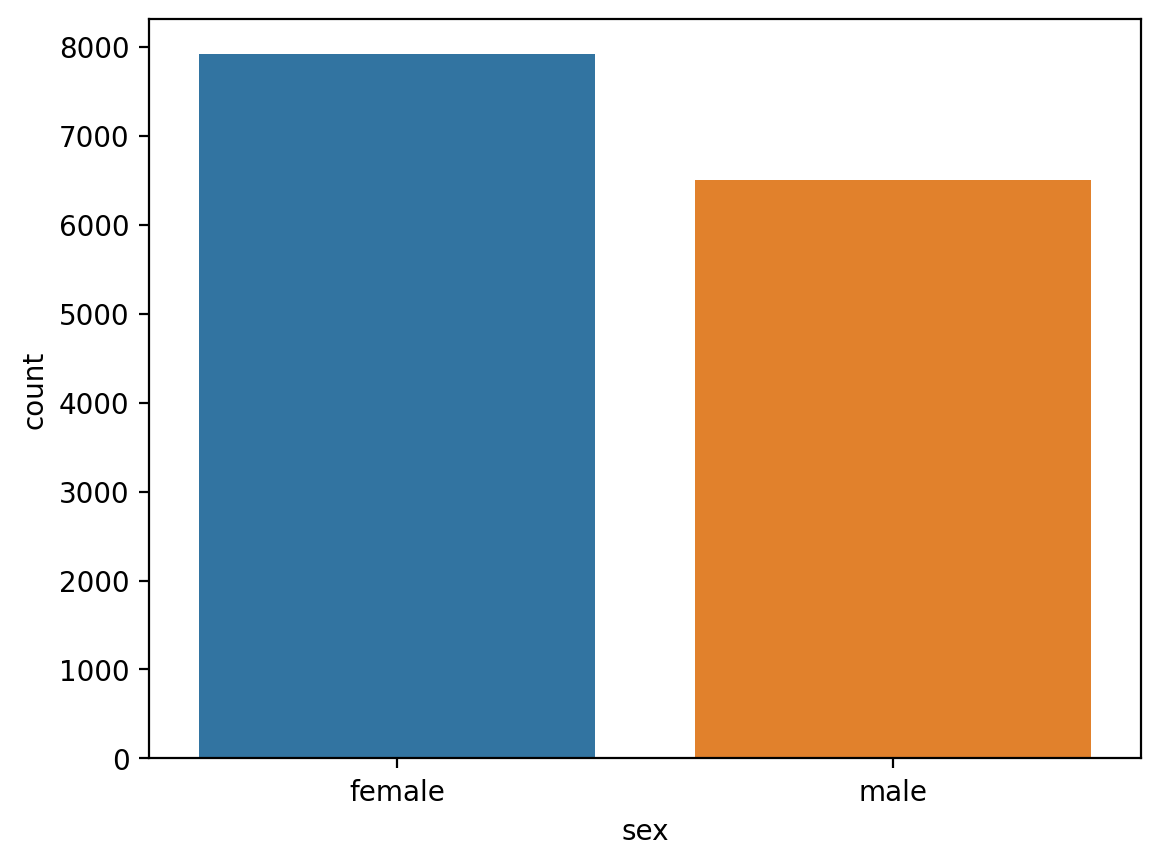

In [15]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'sex')

### 월급 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [16]:
welfare['income'].dtypes  # 변수 타입 출력

dtype('float64')

In [17]:
welfare['income'].describe()  # 요약 통계량 구하기

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

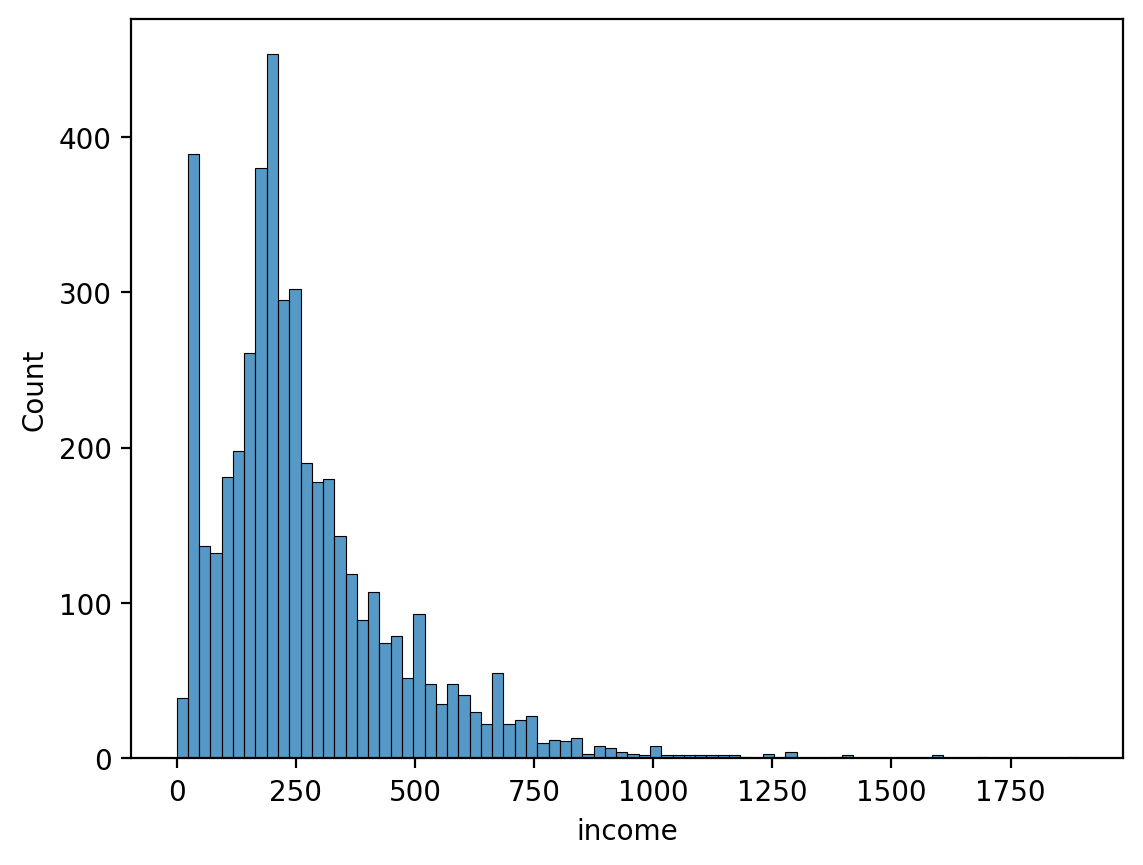

In [18]:
sns.histplot(data = welfare, x = 'income')  # 히스토그램 만들기

#### 2. 전처리하기


In [19]:
welfare['income'].describe()  # 이상치 확인

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [20]:
welfare['income'].isna().sum()  # 결측치 확인

9884

In [21]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

### 성별에 따른 월급 차이 분석하기

#### 1. 성별 월급 평균표 만들기

In [22]:
## 성별 월급 평균표 만들기

# income 결측치 제거
# sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = 'income') \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


#### 2. 그래프 만들기

<Axes: xlabel='sex', ylabel='mean_income'>

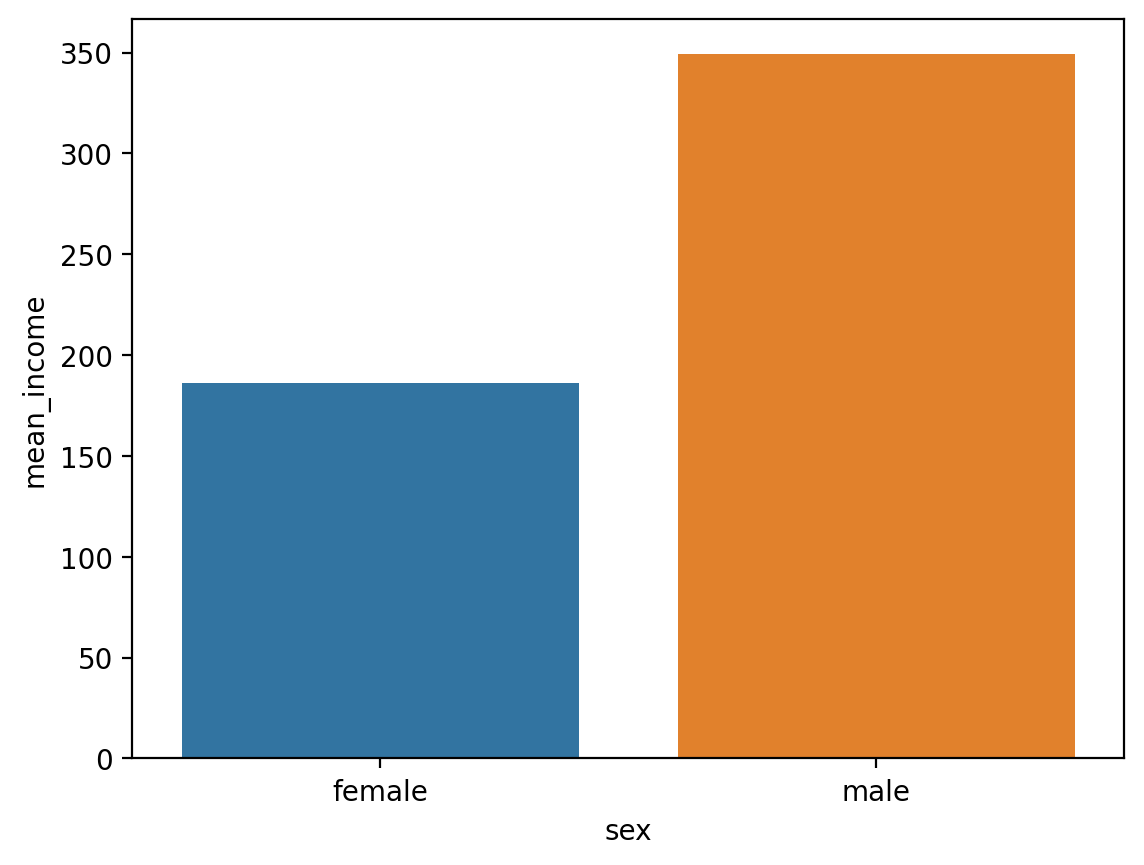

In [23]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')  

## 09-3 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

### 나이 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [24]:
welfare['birth'].dtypes  # 변수 타입 출력

dtype('float64')

In [25]:
welfare['birth'].describe()  # 요약 통계량 구하기

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

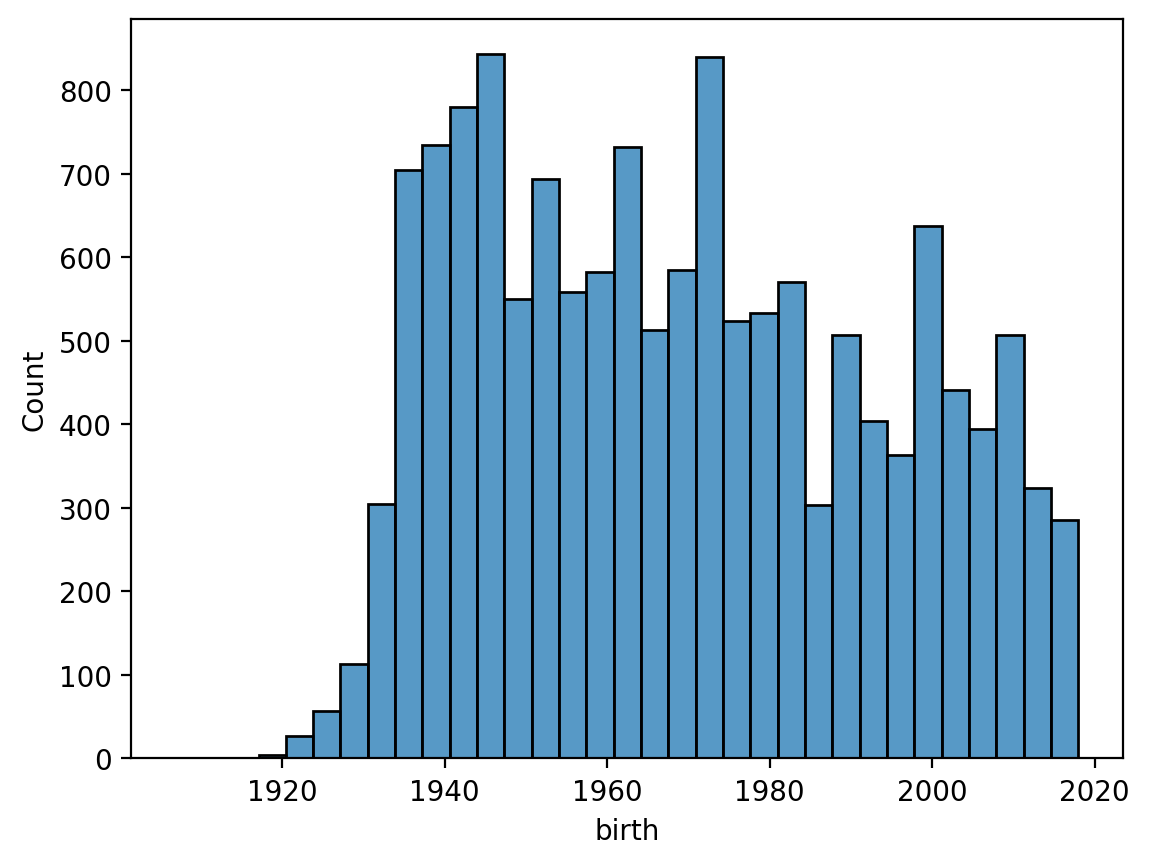

In [26]:
sns.histplot(data = welfare, x = 'birth')  # 히스토그램 만들기

#### 2. 전처리하기

In [27]:
welfare['birth'].describe()  # 이상치 확인

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [28]:
welfare['birth'].isna().sum()  # 결측치 확인

0

In [29]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# 결측치 확인
welfare['birth'].isna().sum()

0

#### 3. 파생변수 만들기 - 나이

In [30]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)  # 나이 변수 만들기
welfare['age'].describe()                                    # 요약 통계량 구하기

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

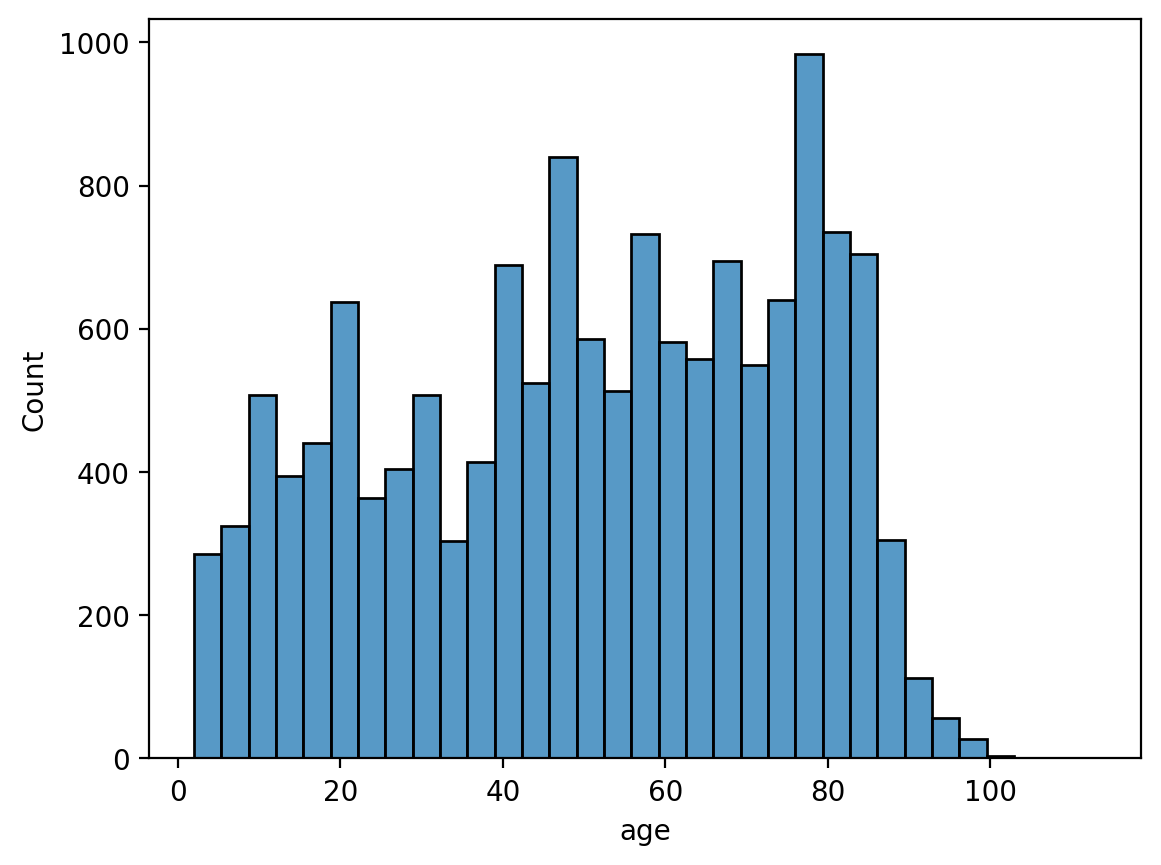

In [31]:
sns.histplot(data = welfare, x = 'age')  # 히스토그램 만들기

### 나이와 월급의 관계 분석하기

#### 1. 나이에 따른 월급 평균표 만들기

In [32]:
## 나이별 월급 평균표 만들기

# income 결측치 제거
# age별 분리
# income 평균 구하기
age_income = welfare.dropna(subset = 'income') \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


#### 2.  그래프 만들기

<Axes: xlabel='age', ylabel='mean_income'>

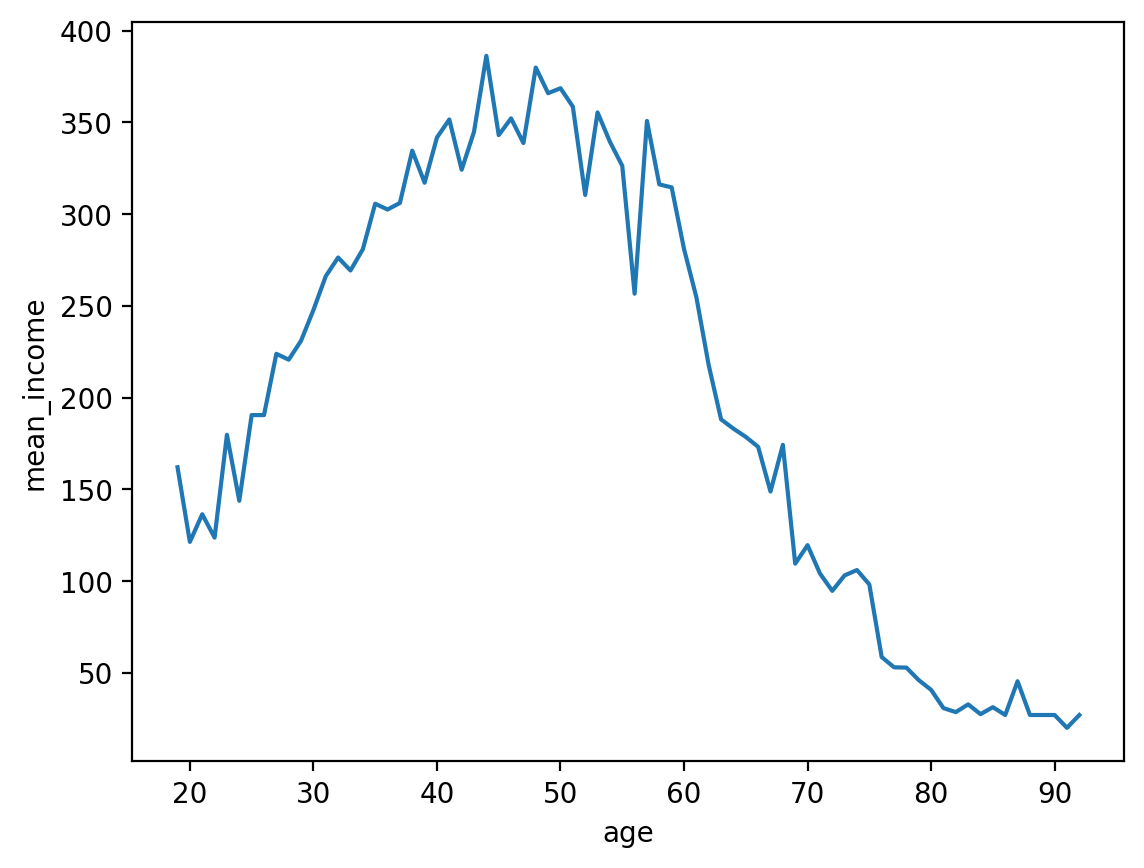

In [33]:
# 선 그래프 만들기
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')  

## 09-4 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?

### 연령대 변수 검토 및 전처리하기

#### 파생변수 만들기 - 연령대


In [34]:
# 나이 변수 살펴보기
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [35]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] <  30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

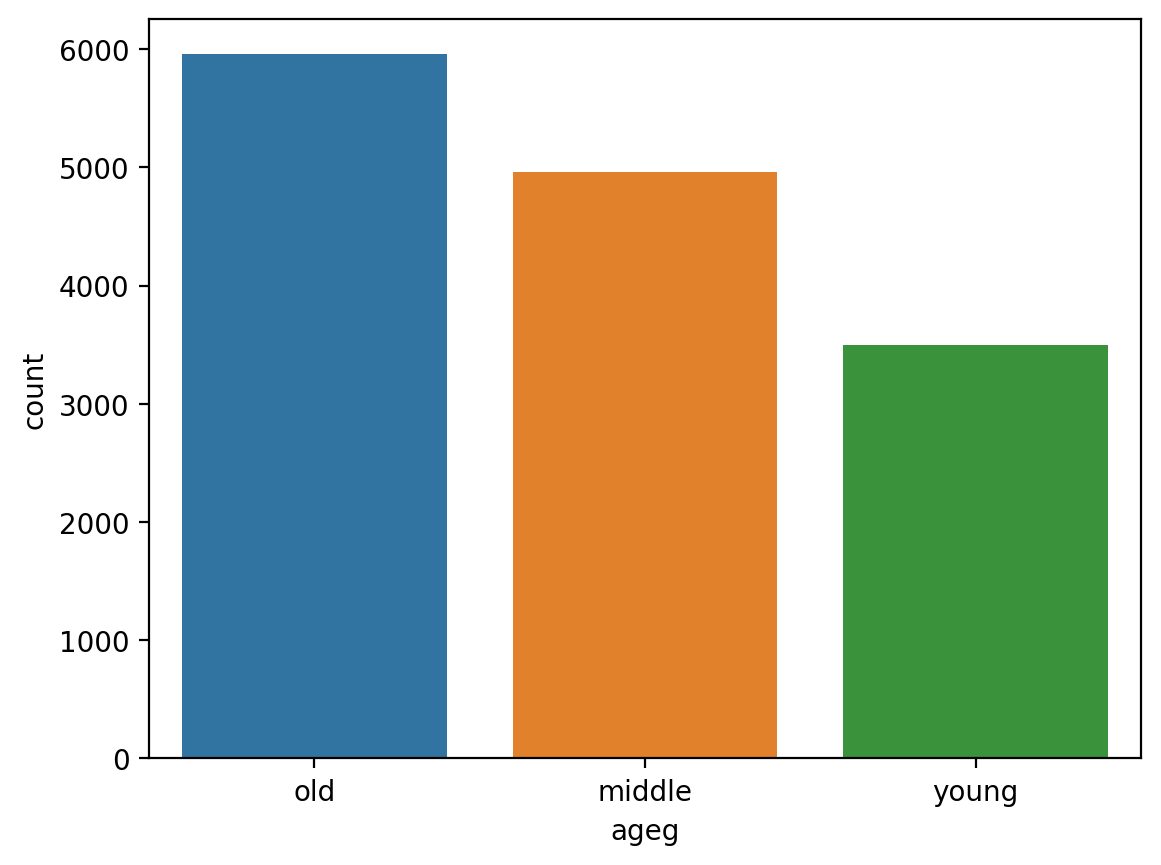

In [36]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'ageg')

### 연령대에 따른 월급 차이 분석하기

#### 1. 연령대별 월급 평균표 만들기

In [37]:
## 연령대별 월급 평균표 만들기

# income 결측치 제거
# ageg별 분리
# income 평균 구하기
ageg_income = welfare.dropna(subset = 'income') \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


#### 2. 그래프 만들기

<Axes: xlabel='ageg', ylabel='mean_income'>

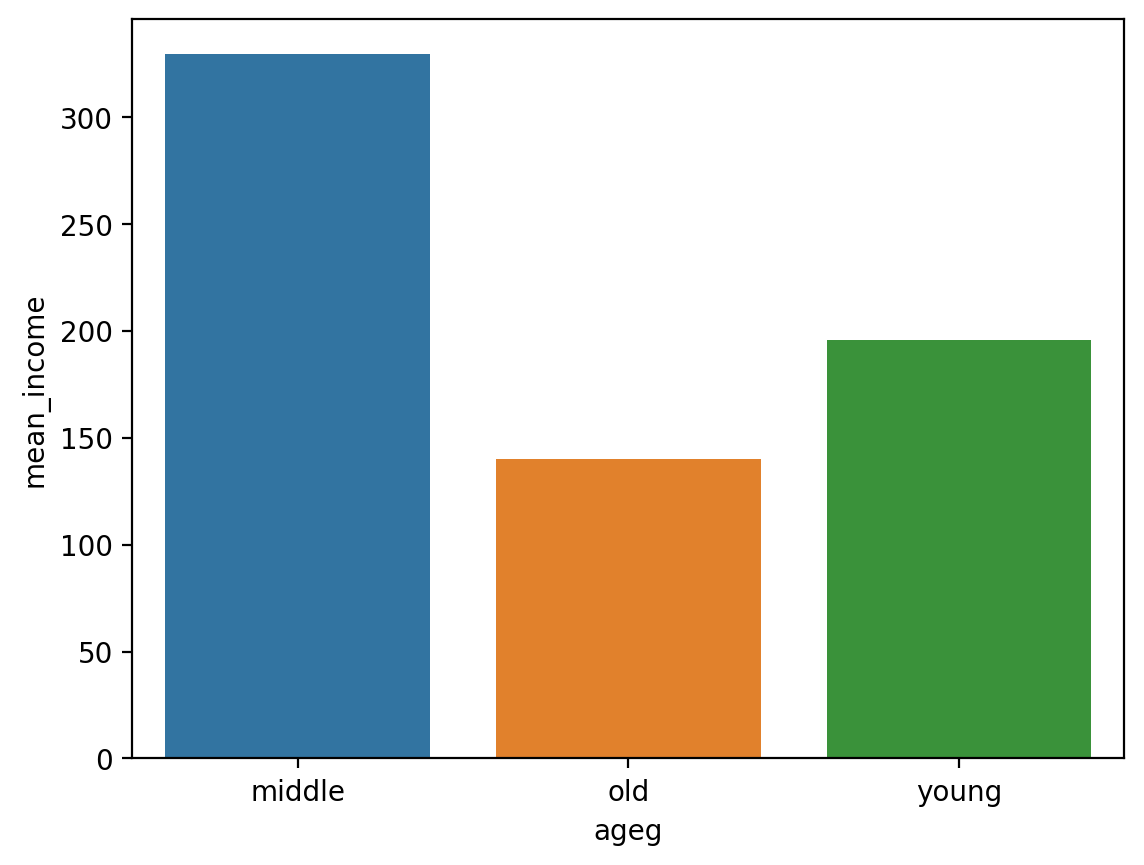

In [38]:
# 막대 그래프 만들기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

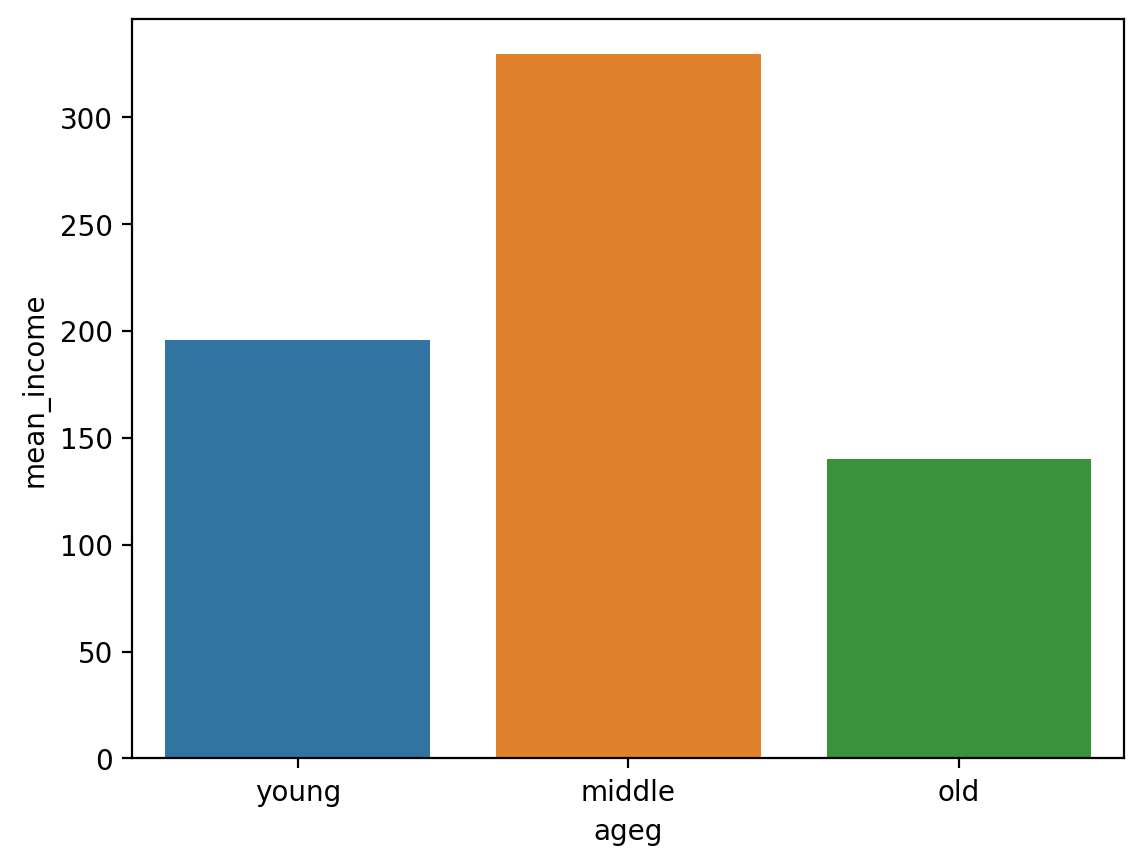

In [39]:
# 막대 정렬하기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])

## 09-5 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?

### 연령대 및 성별 월급 차이 분석하기

#### 1. 연령대 및 성별 월급 평균표 만들기

In [40]:
## 연령대 및 성별 평균표 만들기

# income 결측치 제거
# ageg 및 sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = 'income') \
                    .groupby(['ageg', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


#### 2. 그래프 만들기

<Axes: xlabel='ageg', ylabel='mean_income'>

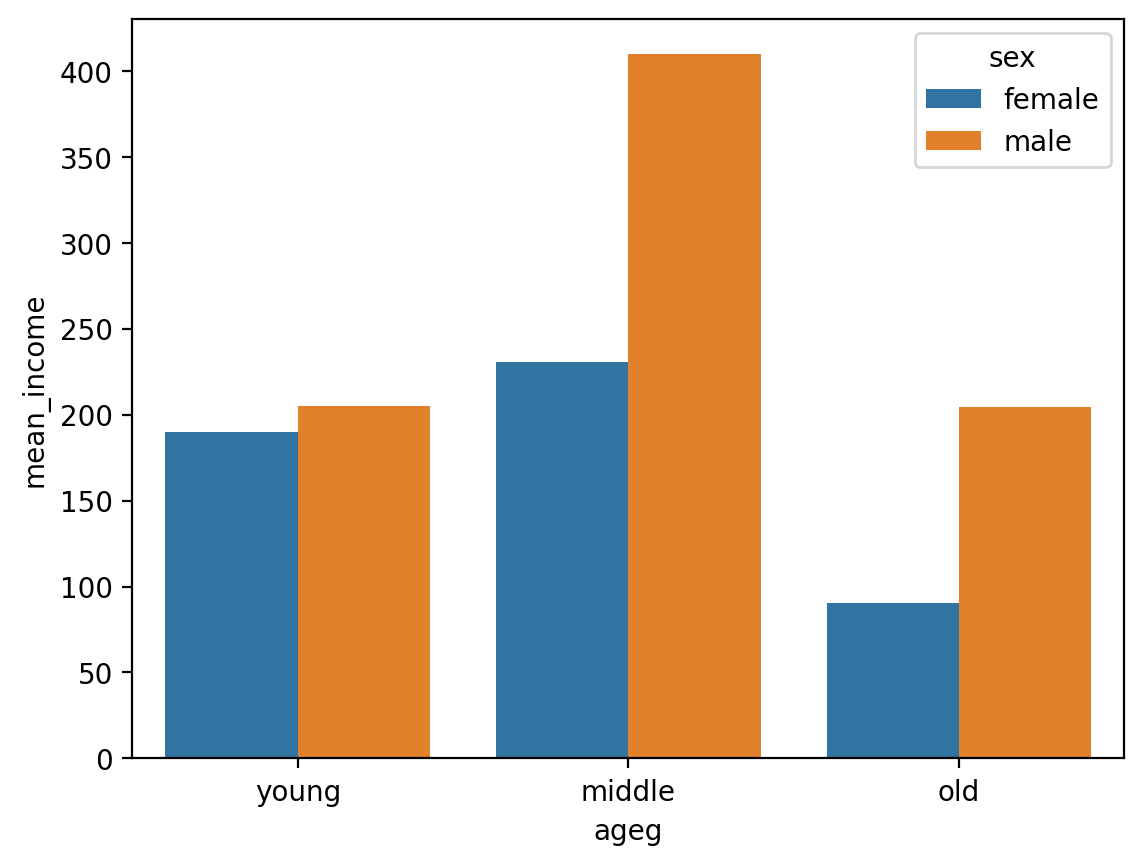

In [41]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

### 나이 및 성별 월급 차이 분석하기

In [42]:
## 나이 및 성별 월급 평균표 만들기

# income 결측치 제거
# age 및 sex별 분리
# income 평균 구하기
sex_age = welfare.dropna(subset = 'income') \
                 .groupby(['age', 'sex'], as_index = False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<Axes: xlabel='age', ylabel='mean_income'>

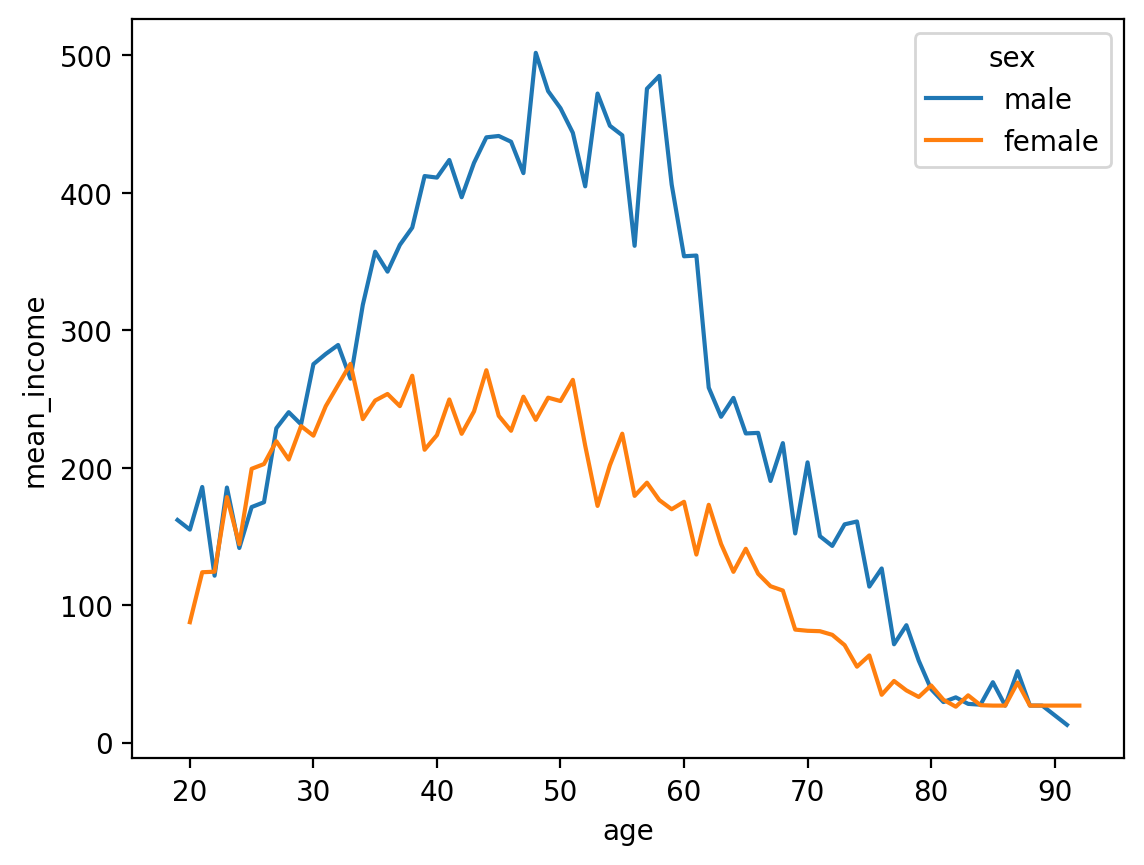

In [43]:
# 선 그래프 만들기
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

## 09-6 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

### 직업 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [44]:
welfare['code_job'].dtypes  # 변수 타입 출력

dtype('float64')

In [45]:
welfare['code_job'].value_counts()  # 빈도 구하기

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

#### 2. 전처리하기

In [46]:
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [47]:
list_job.shape  # 행, 열 개수 출력

(156, 2)

In [48]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [49]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset = 'code_job')[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


### 직업별 월급 차이 분석하기

#### 1. 직업별 월급 평균표 만들기

In [50]:
## 직업별 월급 평균표 만들기

# job, income 결측치 제거
# job별 분리
# income 평균 구하기
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


#### 3. 그래프 만들기

**(1) 월급이 많은 직업**

In [51]:
# 상위 10위 추출
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [52]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<Axes: xlabel='mean_income', ylabel='job'>

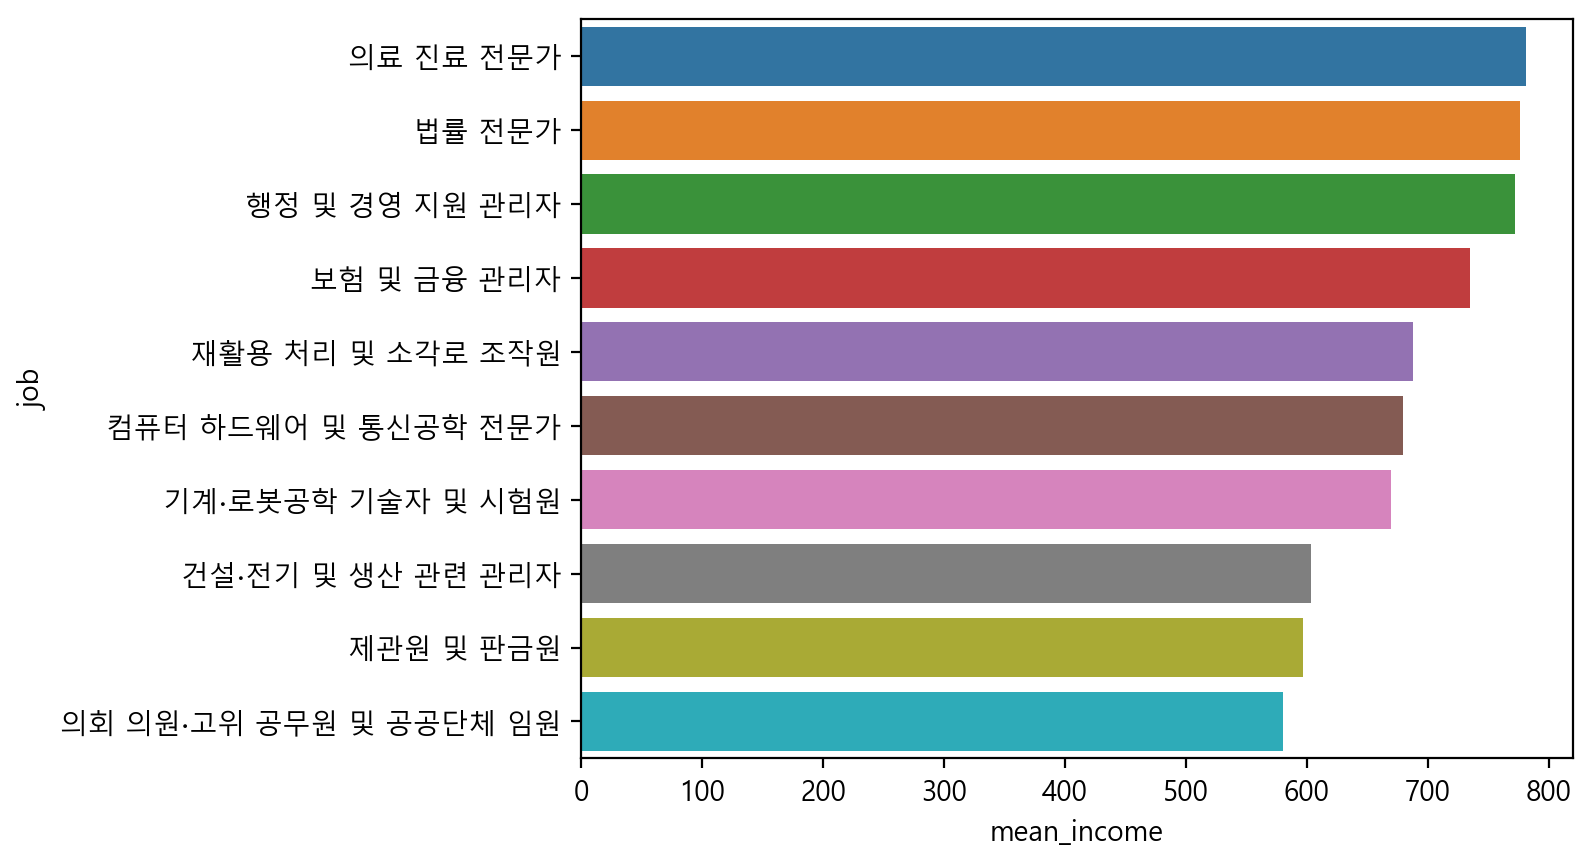

In [53]:
# 막대 그래프 만들기
sns.barplot(data = top10, y = 'job', x = 'mean_income')

**(2) 월급이 적은 직업**

In [54]:
# 하위 10위 추출
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

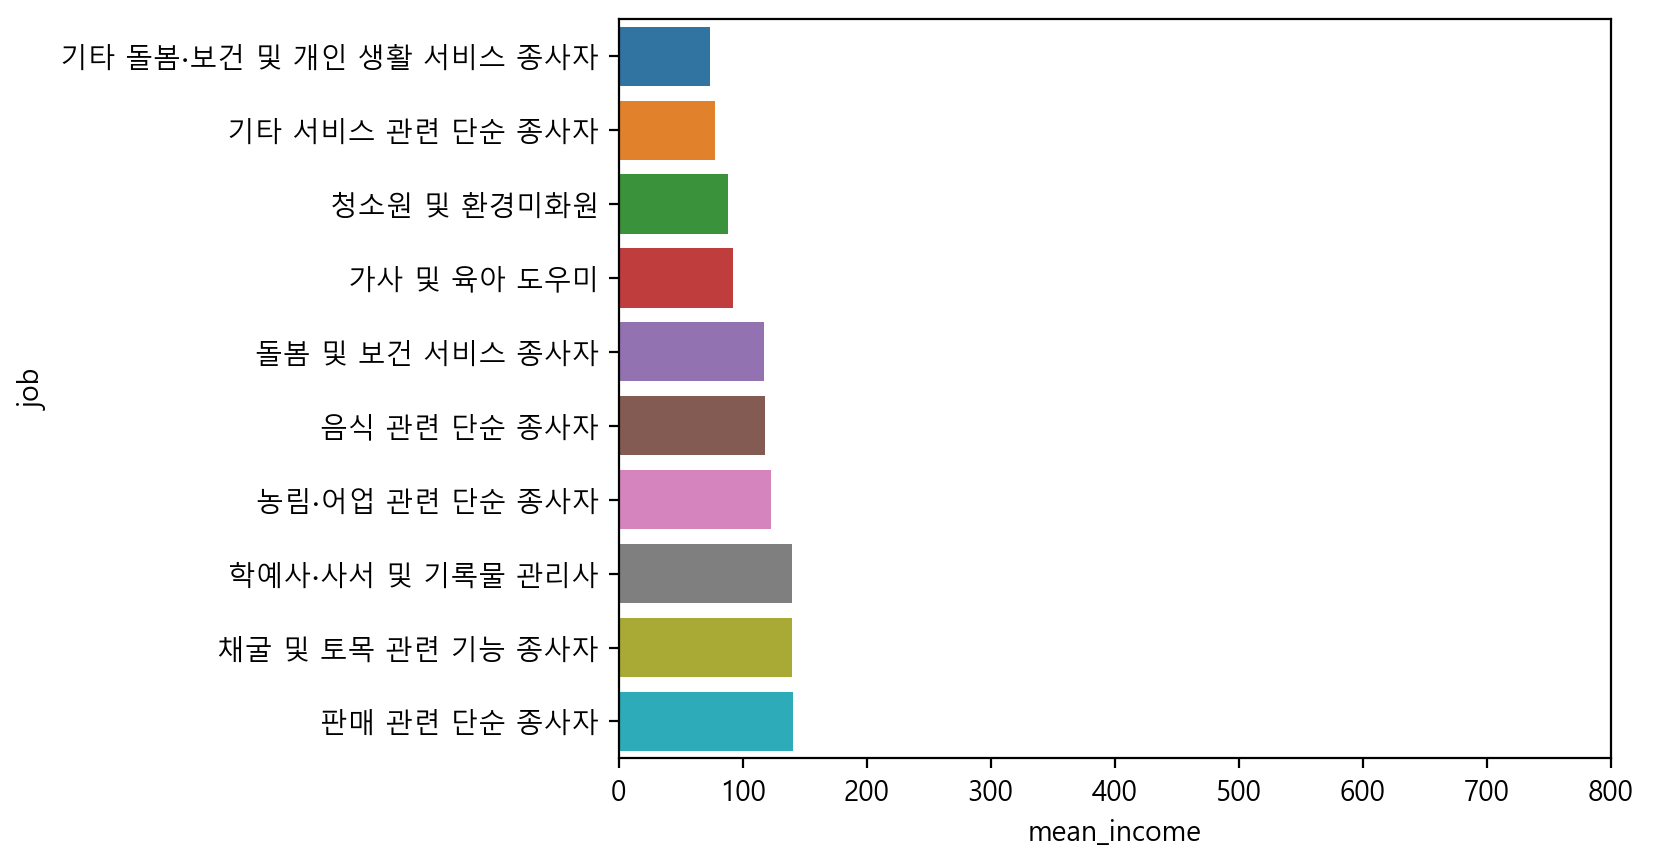

In [55]:
# 막대 그래프 만들기
sns.barplot(data = bottom10, y = 'job', x = 'mean_income') \
   .set(xlim = [0, 800])

## 09-7 성별 직업 빈도 - 성별에 따라 어떤 직업이 가장 많을까?

### 성별 직업 빈도 분석하기

#### 1. 성별 직업 빈도표 만들기

In [56]:
## 남성 직업 빈도 상위 10개 추출

# job 결측치 제거
# male 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_male = welfare.dropna(subset = 'job') \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [57]:
## 여성 직업 빈도 상위 10개 추출

# job 결측치 제거
# female 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_female = welfare.dropna(subset = 'job') \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


#### 2. 그래프 만들기

[(0.0, 500.0)]

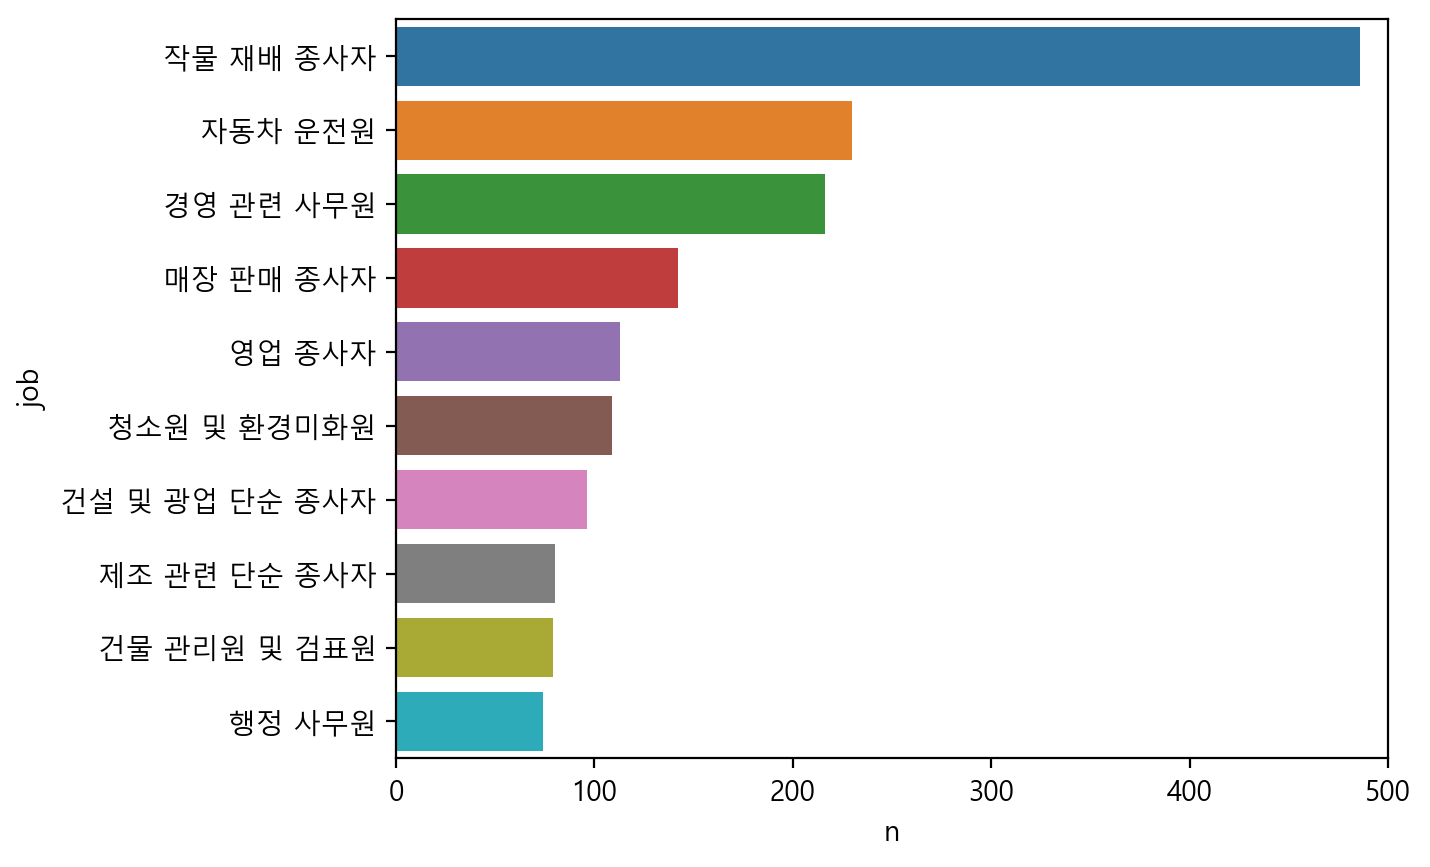

In [58]:
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = [0, 500])

[(0.0, 500.0)]

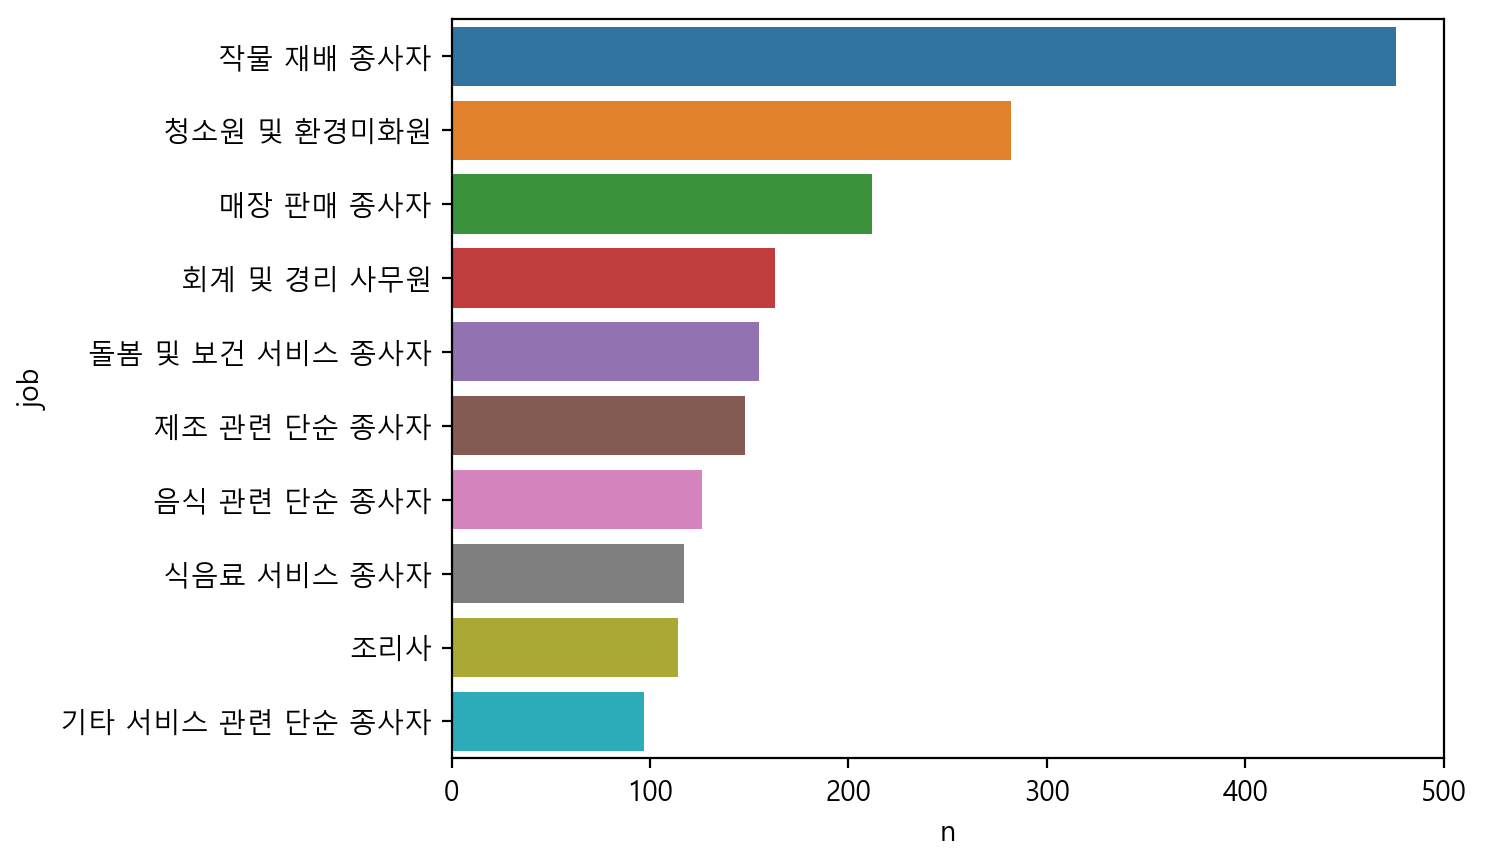

In [59]:
# 여성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = [0, 500])

## 09-8 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?

### 종교 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [60]:
welfare['religion'].dtypes  # 변수 타입 출력

dtype('float64')

In [61]:
welfare['religion'].value_counts()  # 빈도 구하기

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

#### 2. 전처리하기

In [62]:
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

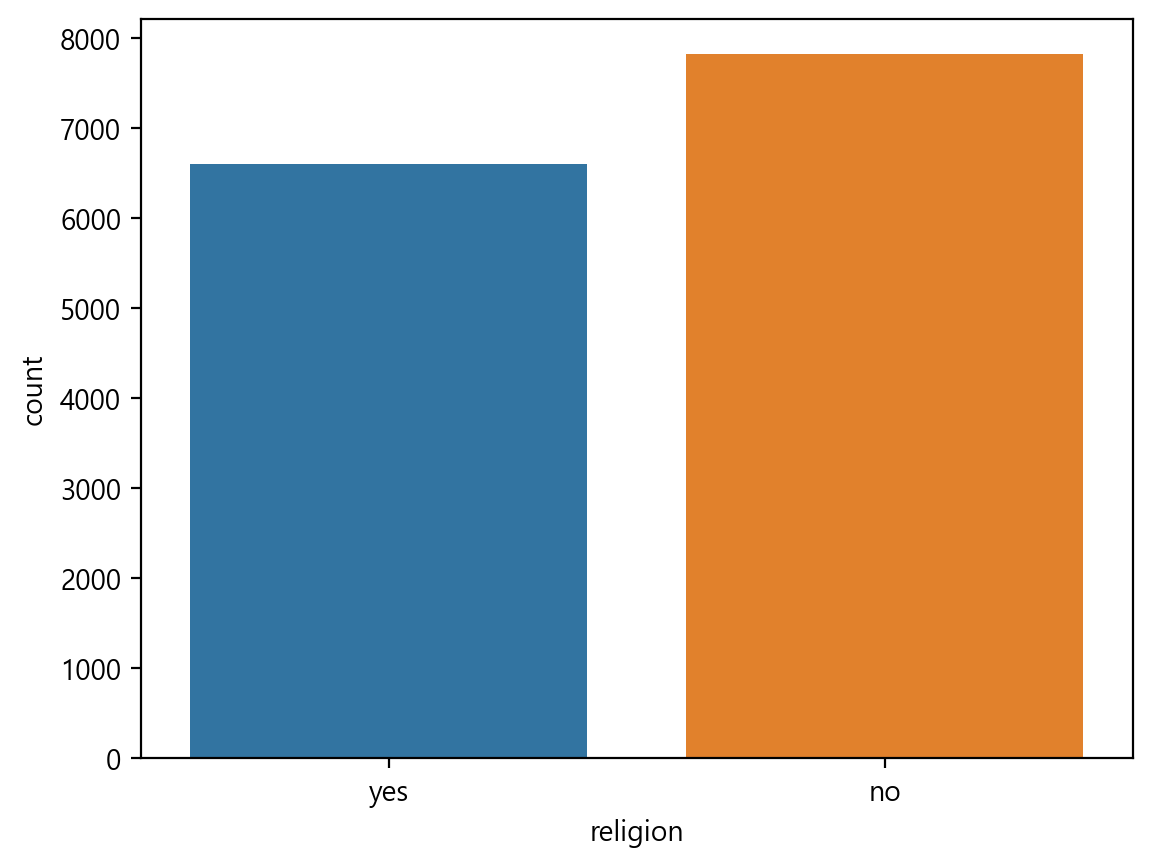

In [63]:
# 막대 그래프 만들기
sns.countplot(data = welfare, x = 'religion')

### 혼인 상태 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [64]:
welfare['marriage_type'].dtypes  # 변수 타입 출력

dtype('float64')

In [65]:
welfare['marriage_type'].value_counts()  # 빈도 구하기

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

#### 2. 파생변수 만들기 - 이혼 여부

In [66]:
# 이혼 여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [67]:
## 이혼 여부별 빈도

# marriage별 분리
# marriage별 빈도 구하기
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

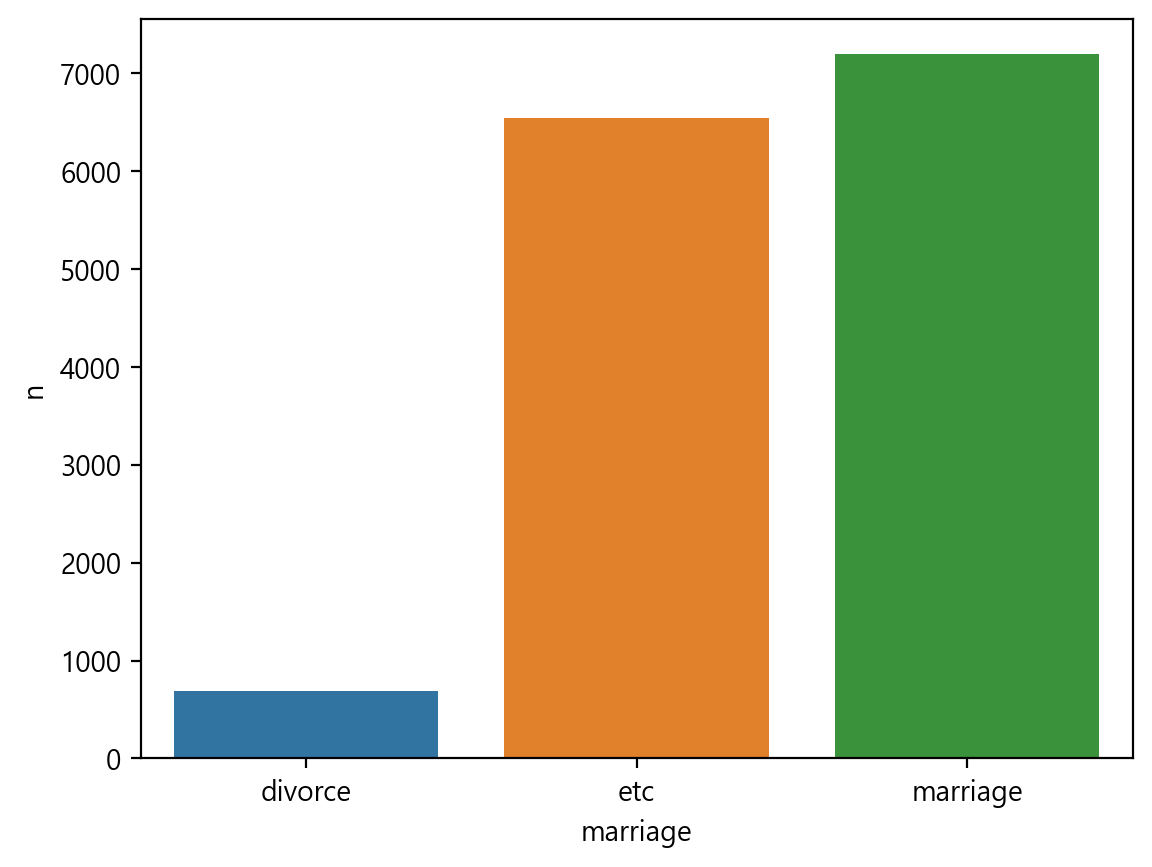

In [68]:
# 막대 그래프 만들기
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

### 종교 유무에 따른 이혼율 분석하기

#### 1. 종교 유무에 따른 이혼율표 만들기

In [69]:
# etc 제외
# religion별 분리
# marriage 추출
# 비율 구하기
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


#### 2. 그래프 만들기

In [70]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \
                 .round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

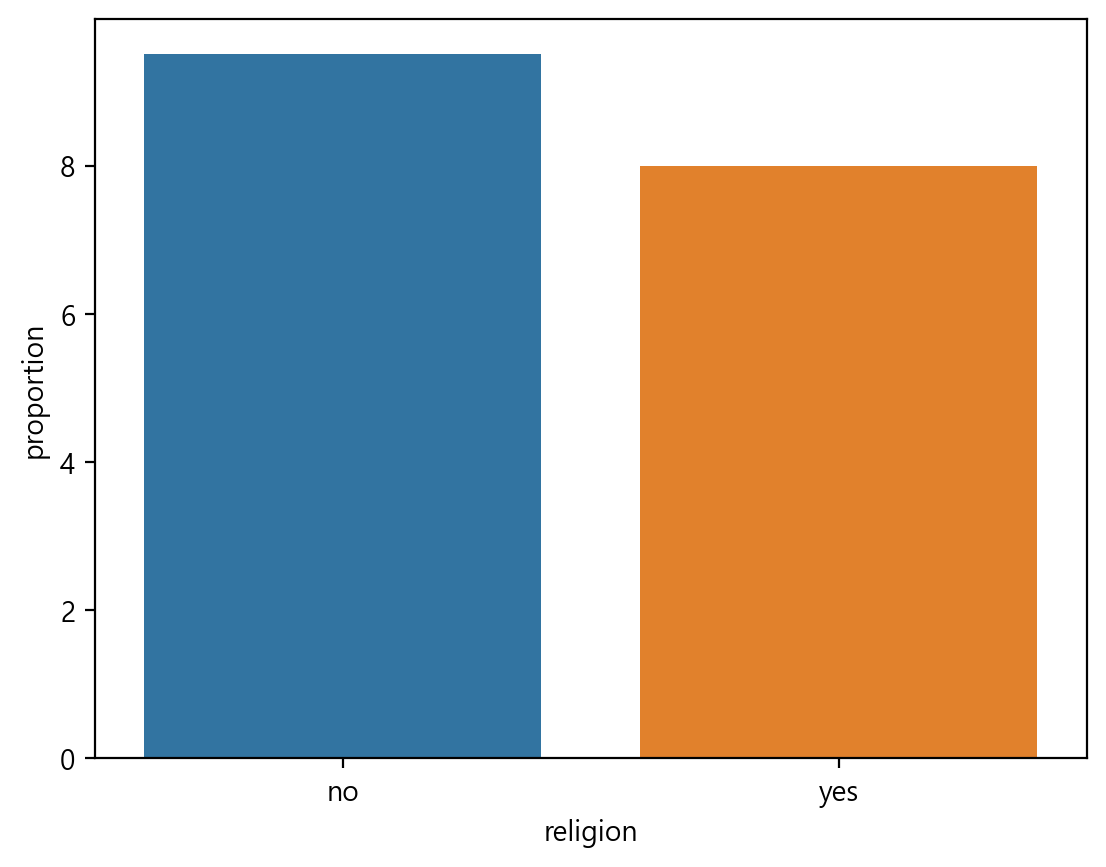

In [71]:
# 막대 그래프 만들기
sns.barplot(data = rel_div, x = 'religion', y = 'proportion')

### 연령대 및 종교 유무에 따른 이혼율 분석하기

#### 1. 연령대별 이혼율표 만들기

In [72]:
# etc 제외
# ageg별 분리
# marriage 추출
# 비율 구하기
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [73]:
## 연령대 및 이혼 여부별 빈도

# etc 제외
# ageg별 분리
# marriage 추출
# 빈도 구하기
welfare.query('marriage != "etc"') \
       .groupby('ageg', as_index = False) \
       ['marriage'] \
       .value_counts()

,ageg,marriage,count
0,middle,marriage,3552
1,middle,divorce,350
2,old,marriage,3581
3,old,divorce,336
4,young,marriage,57
5,young,divorce,3


#### 2. 연령대별 이혼율 그래프 만들기

In [74]:
# 초년층 제외, 이혼 추출
# 백분율로 바꾸기
# 반올림
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6


<Axes: xlabel='ageg', ylabel='proportion'>

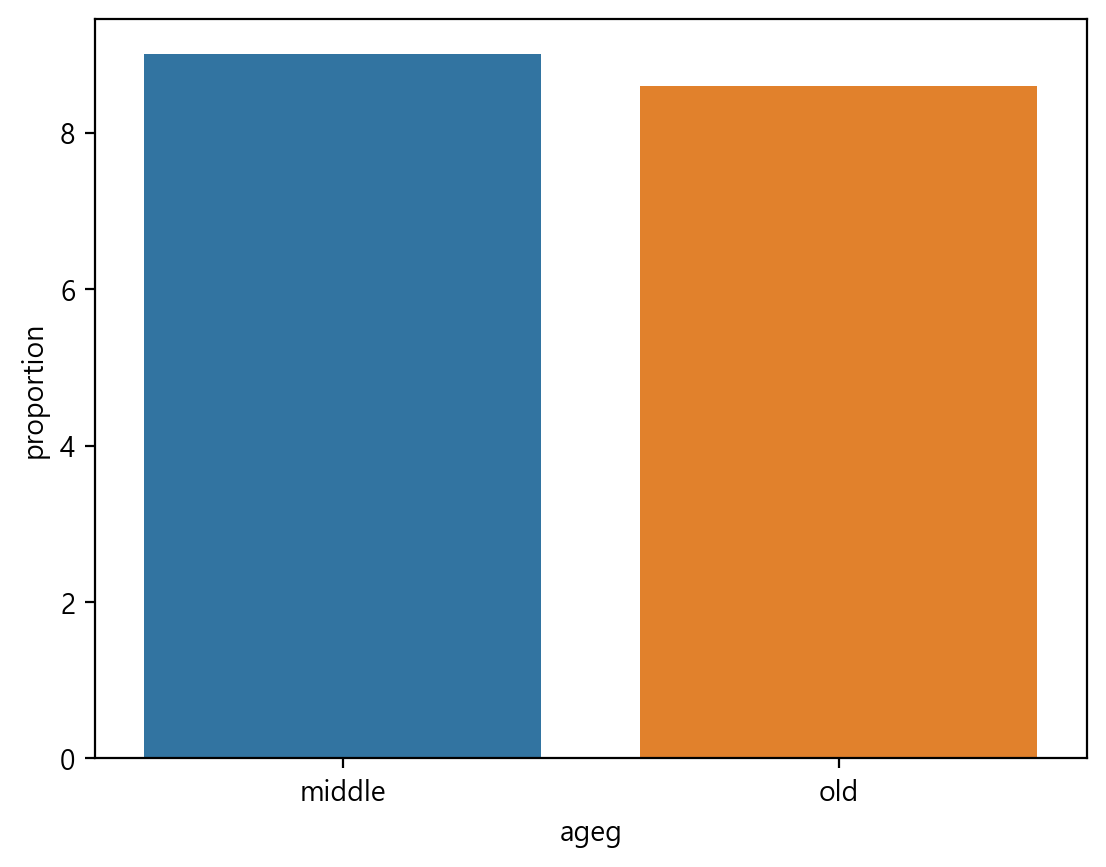

In [75]:
# 막대 그래프 만들기
sns.barplot(data = age_div, x = 'ageg', y = 'proportion')

#### 3. 연령대 및 종교 유무에 따른 이혼율표 만들기

In [76]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
           
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


#### 4. 연령대 및 종교 유무에 따른 이혼율 그래프 만들기

In [77]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100) \
                         .round(1)
                         
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


<Axes: xlabel='ageg', ylabel='proportion'>

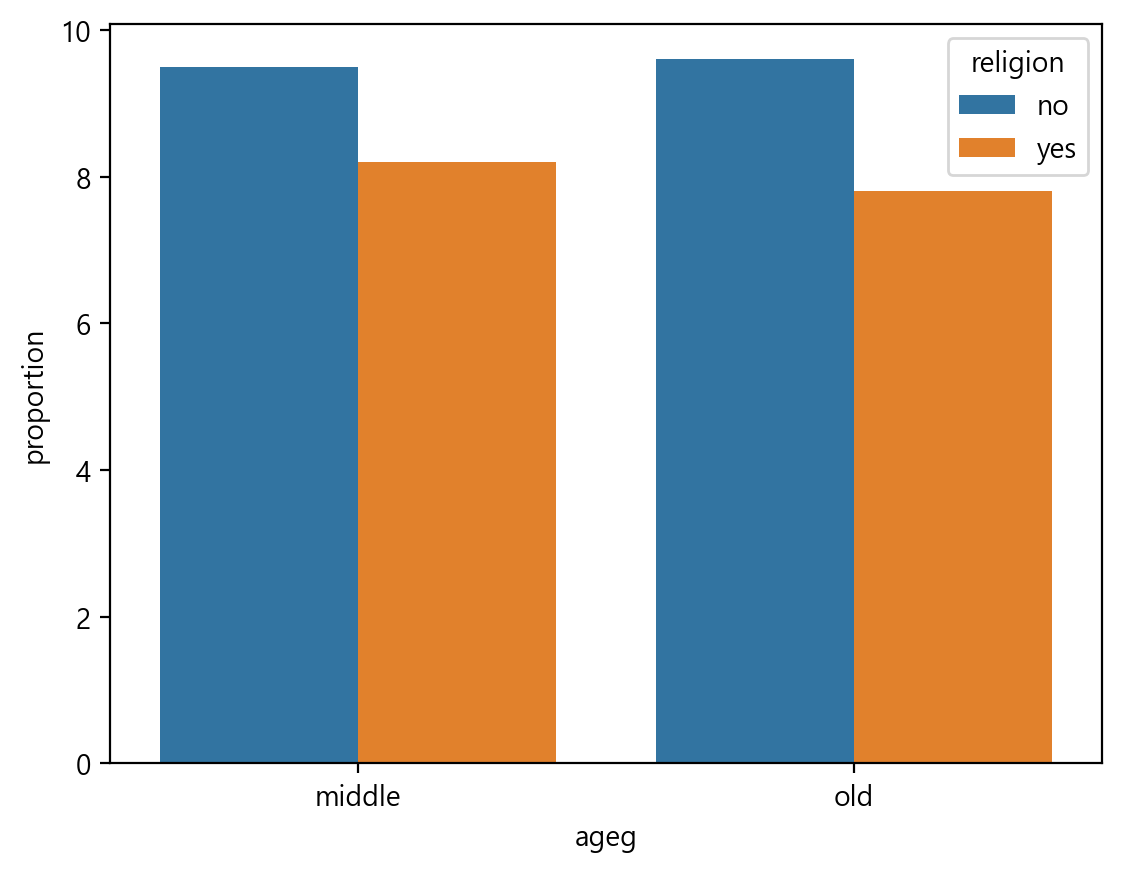

In [78]:
# 막대 그래프 만들기
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

## 09-9 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?

### 지역 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [79]:
welfare['code_region'].dtypes  # 변수 타입 출력

dtype('float64')

In [80]:
welfare['code_region'].value_counts()  # 빈도 구하기

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

#### 2. 전처리하기


In [81]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [82]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


### 지역별 연령대 비율 분석하기

#### 1. 지역별 연령대 비율표 만들기

In [83]:
# region별 분리
# ageg 추출
# 비율 구하기
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


#### 2. 그래프 만들기

In [84]:
# 백분율로 바꾸기
# 반올림
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<Axes: xlabel='proportion', ylabel='region'>

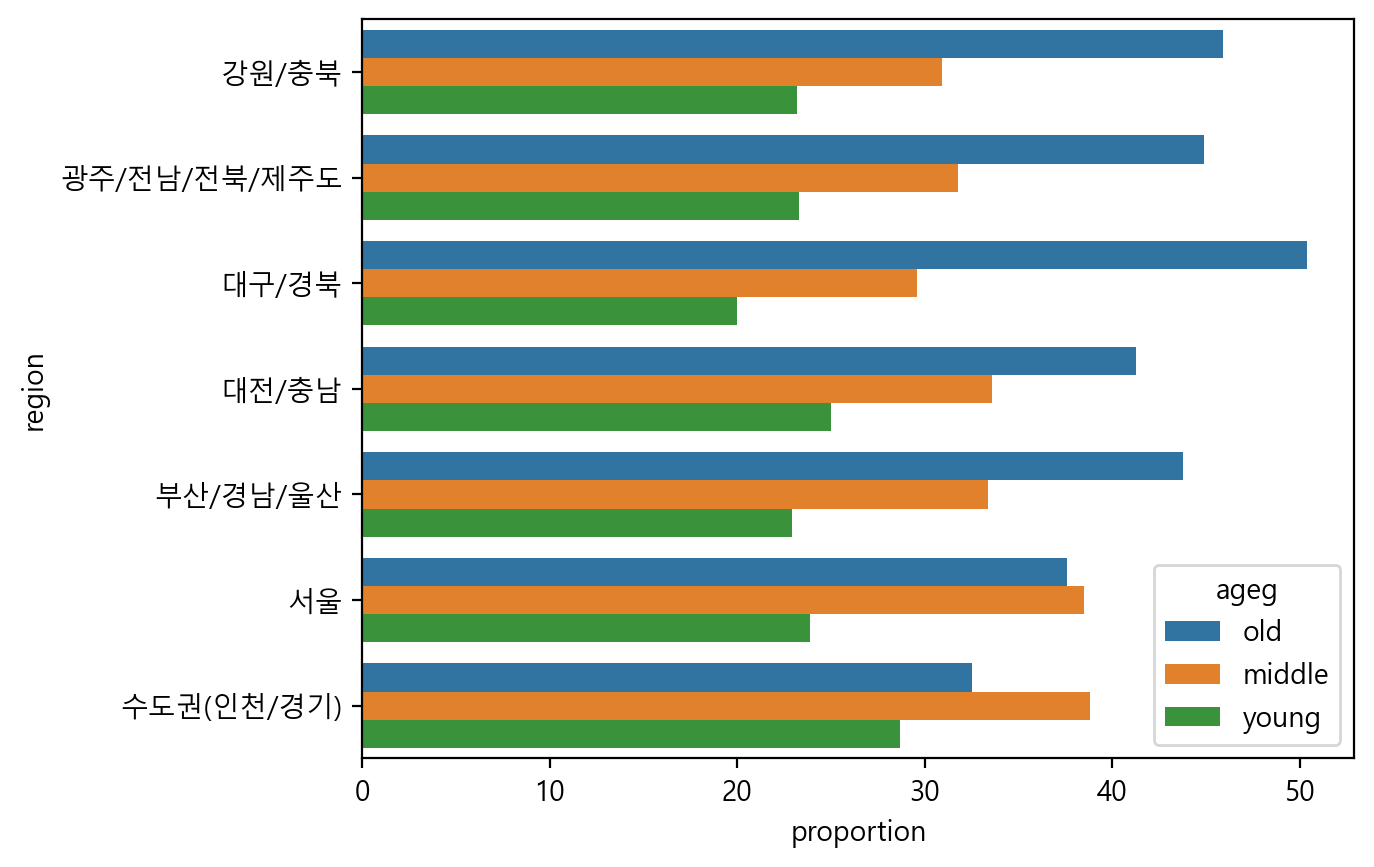

In [85]:
# 막대 그래프 만들기
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

#### 3. 누적 비율 막대 그래프 만들기

**(1) 피벗하기**

In [86]:
# 피벗
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


**(2) 그래프 만들기**

<Axes: ylabel='region'>

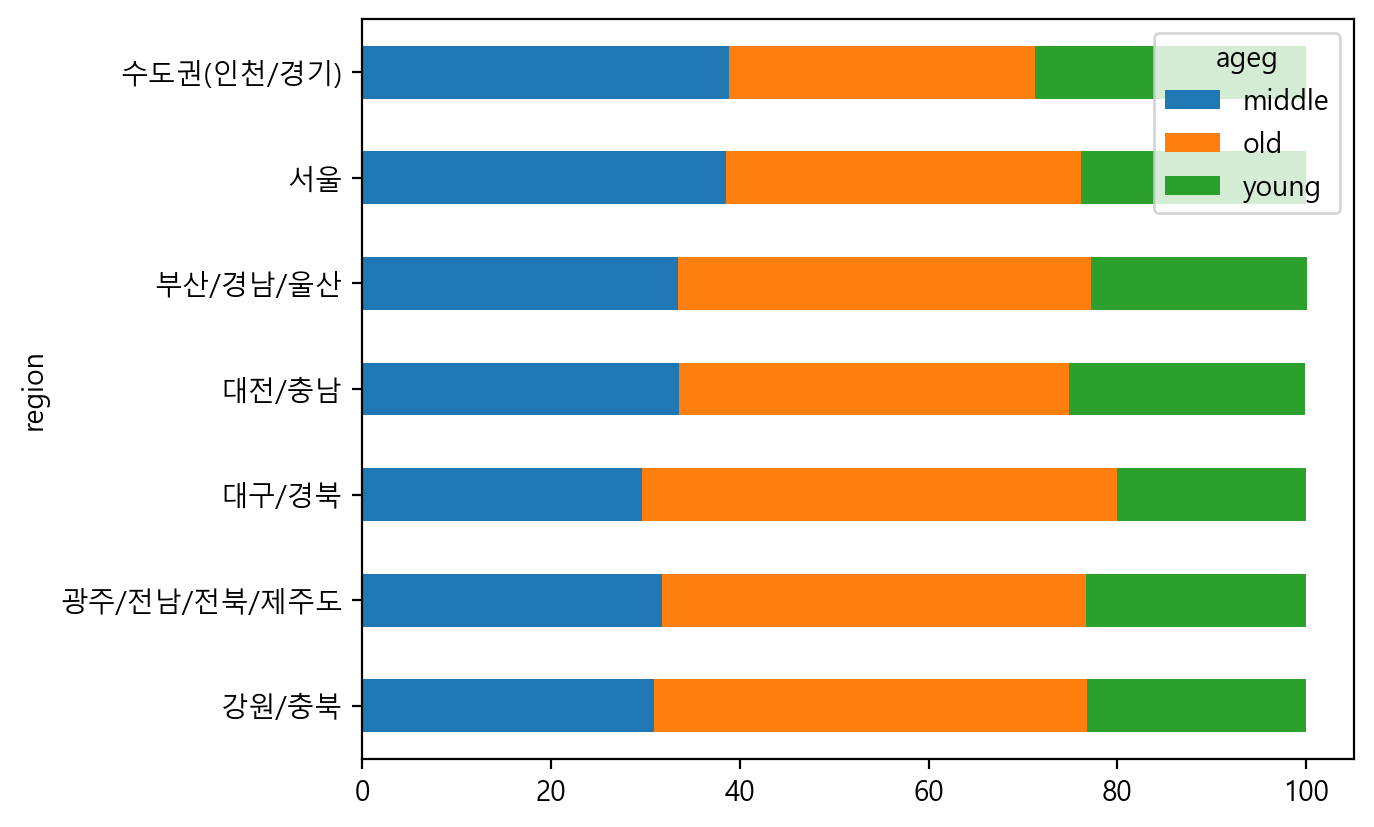

In [87]:
# 가로 막대 그래프 만들기
pivot_df.plot.barh(stacked = True)

**(3) 막대 정렬하기**

In [88]:
# 노년층 비율 기준 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<Axes: ylabel='region'>

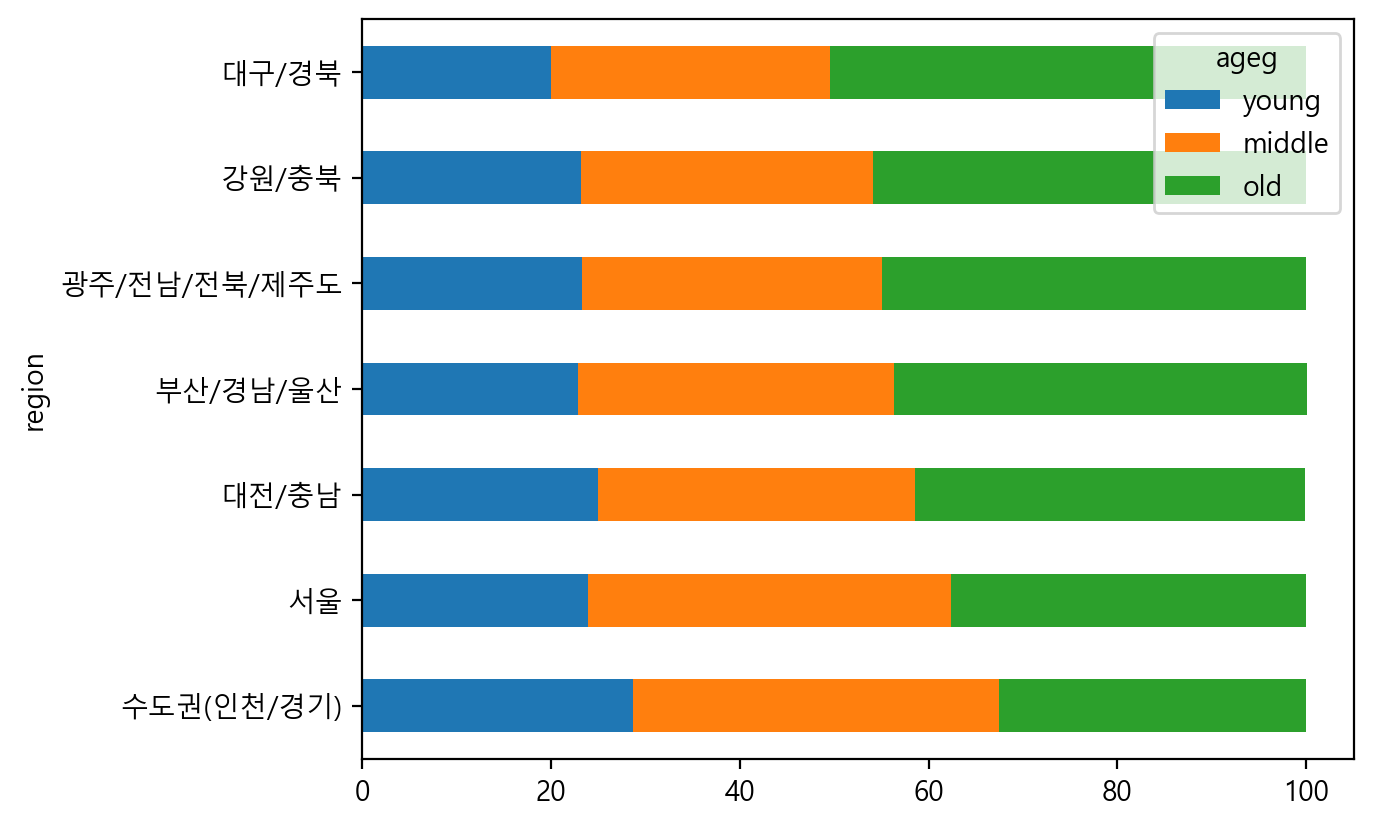

In [89]:
# 누적 가로 막대 그래프 만들기
reorder_df.plot.barh(stacked = True)